In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cigarette-smoker-detection/data/READ.ME
/kaggle/input/cigarette-smoker-detection/data/not_smoking/ggg461.jpg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/ggg045.jpg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/ggg317.jpeg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/ggg642.jpg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/ggg131.jpg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/gg0567.jpg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/ggg202.jpg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/gg0353.jpg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/gg0495.jpg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/ggg060.png
/kaggle/input/cigarette-smoker-detection/data/not_smoking/gg0501.jpg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/gg0581.jpg
/kaggle/input/cigarette-smoker-detection/data/not_smoking/ggg223.png
/kaggle/input/cigarette-smoker-detection/data/no

# Importing Packages

In [3]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=f04542d9cfa4e03d55fdb11e05103ee4e44be4abf455266ea896087905f29b99
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

# Creating Base Directory

In [5]:
dataset_path='/kaggle/input/cigarette-smoker-detection/data/'
model_store_dir='smoking_detector.model'

In [6]:
INIT_LR = 1e-4
EPOCHS = 100
BS = 32
imagePaths = list(paths.list_images(dataset_path))

In [7]:
data = []
labels = []
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)
    labels.append(label)
data = np.array(data, dtype="float32")
labels = np.array(labels)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:961: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [11]:
data[0]

(224, 224, 3)

In [13]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [14]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)


9412608/9406464 [==============================] - 0s 0us/step


Epoch 1/100
162/162 [==============================] - 51s 317ms/step - loss: 0.5841 - accuracy: 0.7087 - val_loss: 0.4491 - val_accuracy: 0.8049
Epoch 2/100
162/162 [==============================] - 50s 310ms/step - loss: 0.4734 - accuracy: 0.7889 - val_loss: 0.4097 - val_accuracy: 0.8126
Epoch 3/100
162/162 [==============================] - 50s 306ms/step - loss: 0.4417 - accuracy: 0.8027 - val_loss: 0.3845 - val_accuracy: 0.8372
Epoch 4/100
162/162 [==============================] - 50s 310ms/step - loss: 0.4121 - accuracy: 0.8262 - val_loss: 0.3700 - val_accuracy: 0.8387
Epoch 5/100
162/162 [==============================] - 50s 309ms/step - loss: 0.3921 - accuracy: 0.8340 - val_loss: 0.3590 - val_accuracy: 0.8464
Epoch 6/100
162/162 [==============================] - 50s 307ms/step - loss: 0.3829 - accuracy: 0.8371 - val_loss: 0.3510 - val_accuracy: 0.8479
Epoch 7/100
162/162 [==============================] - 50s 309ms/step - loss: 0.3740 - accuracy: 0.8394 - val_loss: 0.3432 -

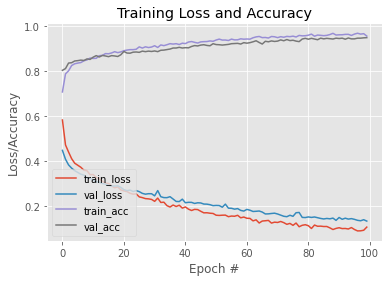

In [15]:
for layer in baseModel.layers:
    layer.trainable = False
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

H = model.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

print(classification_report(testY.argmax(axis=1), predIdxs,target_names=lb.classes_))

model.save(model_store_dir, save_format="h5")
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('ploy.jpg')
